In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cricket = pd.read_csv("deliveries.csv")

In [3]:
cricket

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


## 1) Total runs of Virat Kohli (including all matches)

In [4]:
Kolhi_runs = cricket[cricket["batsman"] == "V Kohli"]["batsman_runs"].sum()

In [5]:
Kolhi_runs

4423

## 2) Total wickets and their dismissal types by YS Chahal

In [6]:
chahal = cricket[cricket["bowler"] == "YS Chahal"]

In [7]:
chahal_wickets = chahal.groupby("dismissal_kind")["dismissal_kind"].count()

In [8]:
chahal_wickets.drop("run out",inplace=True)

In [9]:
chahal_wickets

dismissal_kind
bowled                9
caught               49
caught and bowled     1
lbw                   3
stumped               8
Name: dismissal_kind, dtype: int64

In [10]:
chahal_wickets.sum()

70

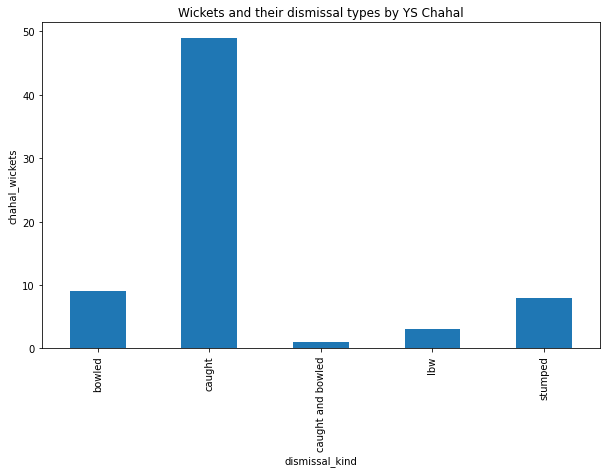

In [11]:
plt.figure(figsize=(10,6))
chahal_wickets.plot(kind="bar")
plt.title("Wickets and their dismissal types by YS Chahal")
plt.xlabel("dismissal_kind")
plt.ylabel("chahal_wickets")
plt.show()

## 3) Top 3 runs scorers (all matches)

In [12]:
runs = cricket.groupby(["batsman"])["batsman_runs"].sum()

In [13]:
Top_three = runs.sort_values(ascending=False).head(3)

In [14]:
Top_three

batsman
SK Raina     4548
V Kohli      4423
RG Sharma    4207
Name: batsman_runs, dtype: int64

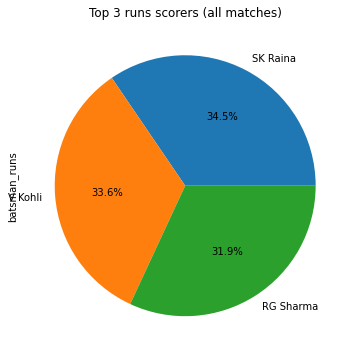

In [15]:
plt.figure(figsize=(10,6))
Top_three.plot(kind="pie",autopct="%1.1f%%")
plt.title("Top 3 runs scorers (all matches)")
plt.show()

## 4) The highest total score of an inning

In [16]:
Highest_runs = cricket.groupby(["match_id","inning"])["total_runs"].sum().max()

In [17]:
Highest_runs

263

In [18]:
cricket.groupby(["match_id","inning"])["total_runs"].sum().idxmax()

(411, 1)

## 5) The average score per match of Virat Kohli

In [19]:
Kohli = cricket[cricket["batsman"] == "V Kohli"]

In [20]:
Kohli.groupby("match_id")["batsman_runs"].sum().mean()

31.368794326241133

## 6) The strike-rate of RG Sharma (Rohit Sharma)

In [21]:
rohit = cricket[cricket["batsman"] == "RG Sharma"]

In [22]:
balls = len(rohit)

In [23]:
runs = rohit["batsman_runs"].sum()

In [24]:
strike_rate = runs / balls

In [25]:
strike_rate

1.2849725106902872

## 7) If a team scores 200+ in first innings, what is their probability of winning?

In [26]:
match_scores = cricket.groupby(["match_id","inning"])["total_runs"].sum()

In [27]:
match_scores = match_scores.reset_index()

In [28]:
match_scores.head()

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183


In [29]:
inning1 = match_scores[(match_scores["inning"]==1) & (match_scores["total_runs"] >= 200)]

In [30]:
inning2 = match_scores[match_scores["inning"]==2]

In [31]:
match_200 = pd.merge(inning1,inning2, on="match_id")

In [32]:
total_200 = len(match_200)

In [33]:
total_200

49

In [34]:
total_won = match_200[match_200["total_runs_x"] > match_200["total_runs_y"]]

In [35]:
total_won = len(total_won)

In [36]:
prob = total_won/total_200

In [37]:
prob

0.8571428571428571